In [2]:
import tables
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [3]:
def readtime(path):
    coeff_time = []
    rd = []
    ra = np.arange(0.01,0.650,0.01)
    for i in ra:
        try:
            h = tables.open_file(path + '/file_%+.3f.h5' % i)
            coeff_time.append(h.root.coeff9[:])
            rd.append(i)
        except:
            pass
    coeff_time = np.array(coeff_time)
    '''
    for i in np.arange(5):
        plt.figure(num=i+1, dpi=300)
        plt.plot(ra[1:-2], coeff_time[1:-2,i])
        plt.xlabel('Radius/m')
        plt.ylabel('Legendre Coefficient of Time Info')
        plt.title('Time %d-th order, quantile = %.2f' % (i,0.01) )
        plt.savefig('/mnt/stage/douwei/Simulation/1t_root/fig/Time%d.pdf' % i)
        plt.show()
    '''
    return np.array(rd), coeff_time.T

(64,) (9, 64)


/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user

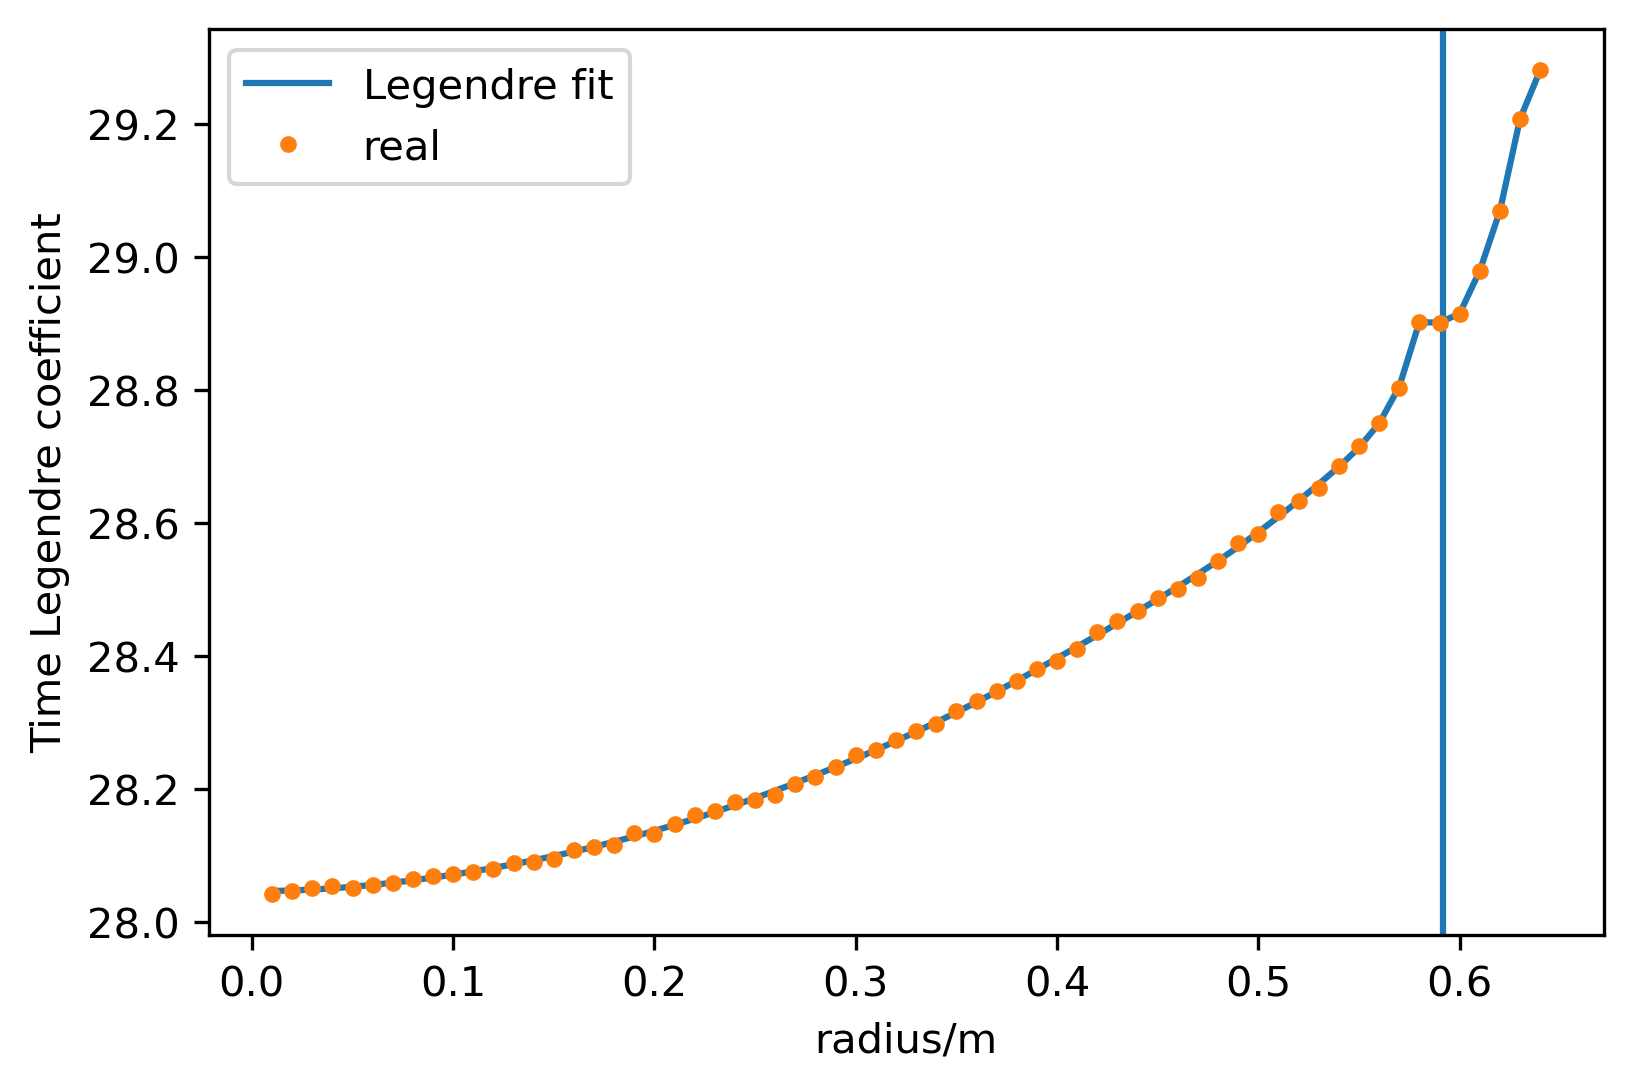

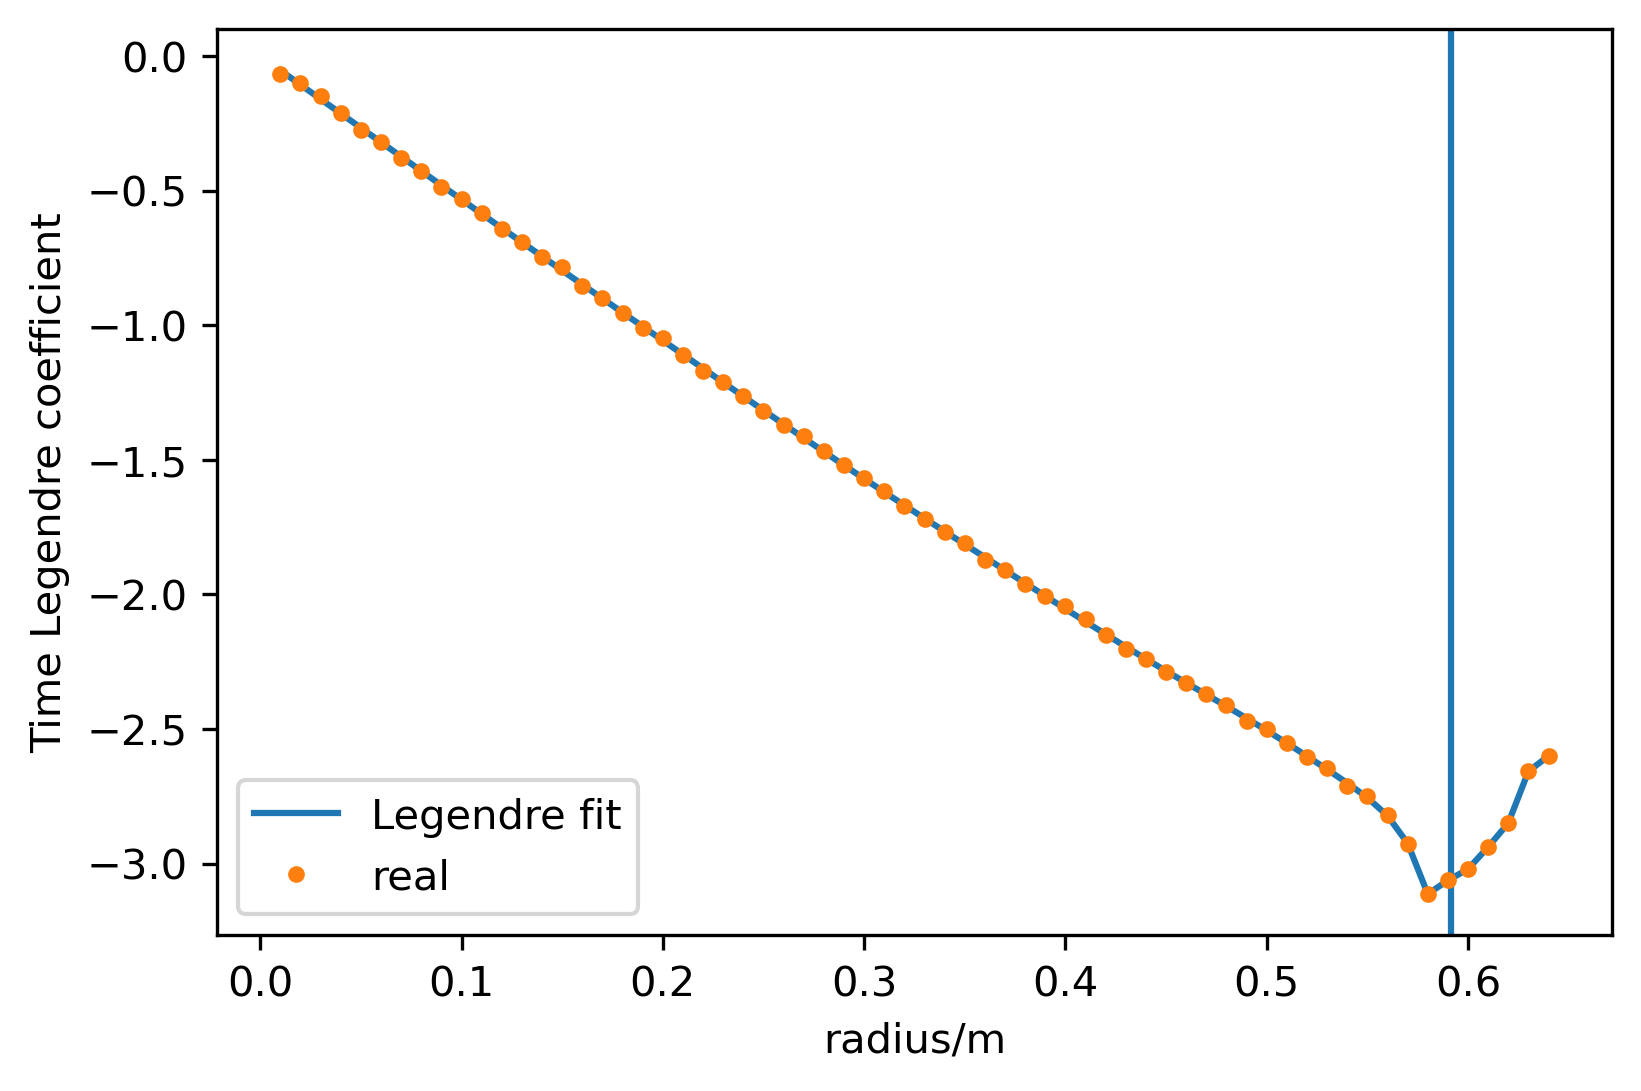

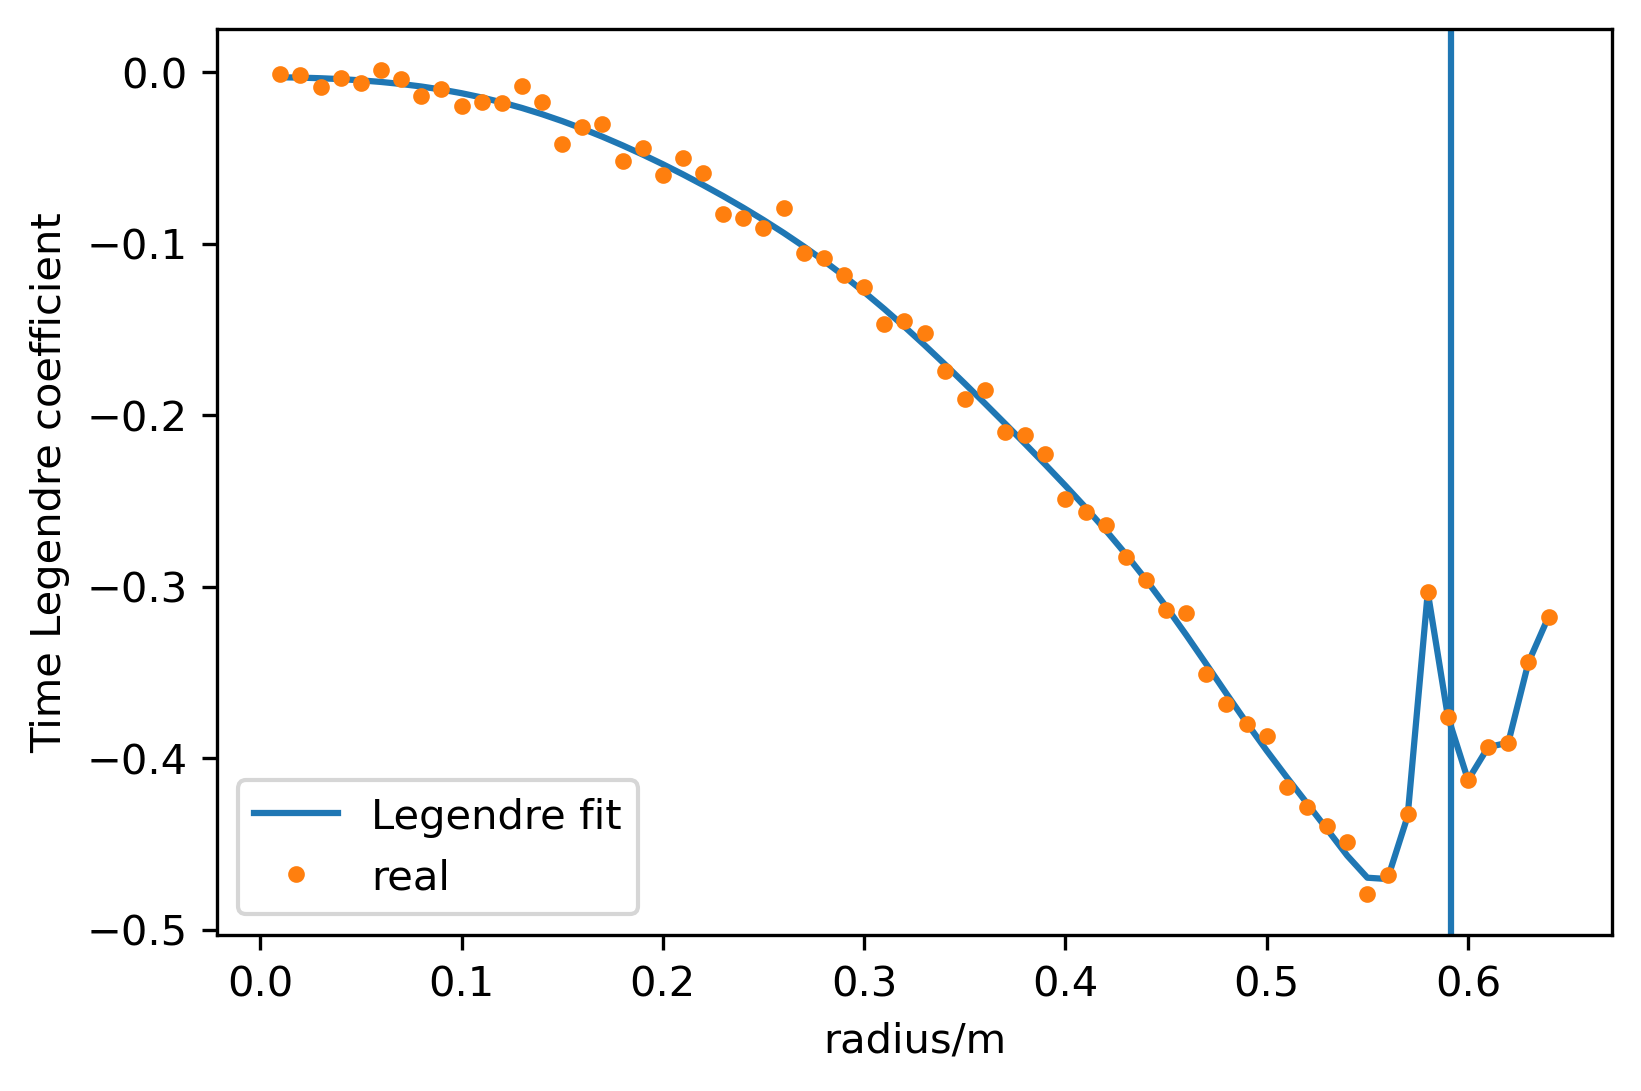

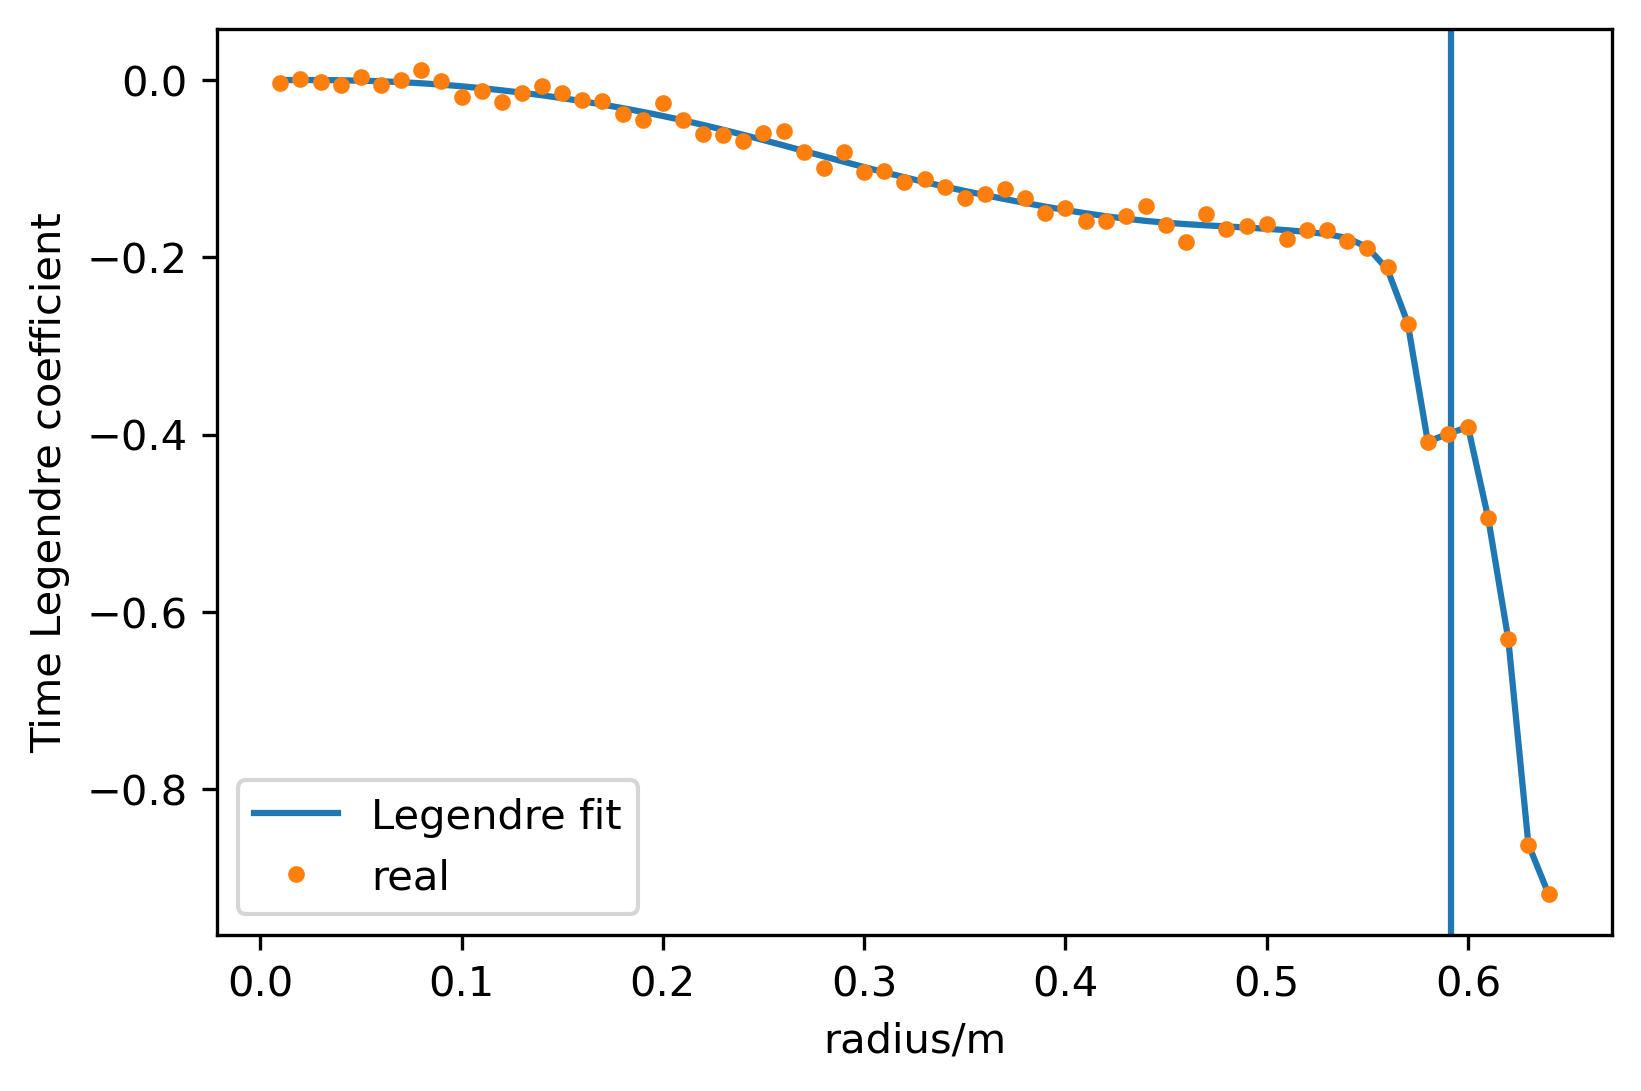

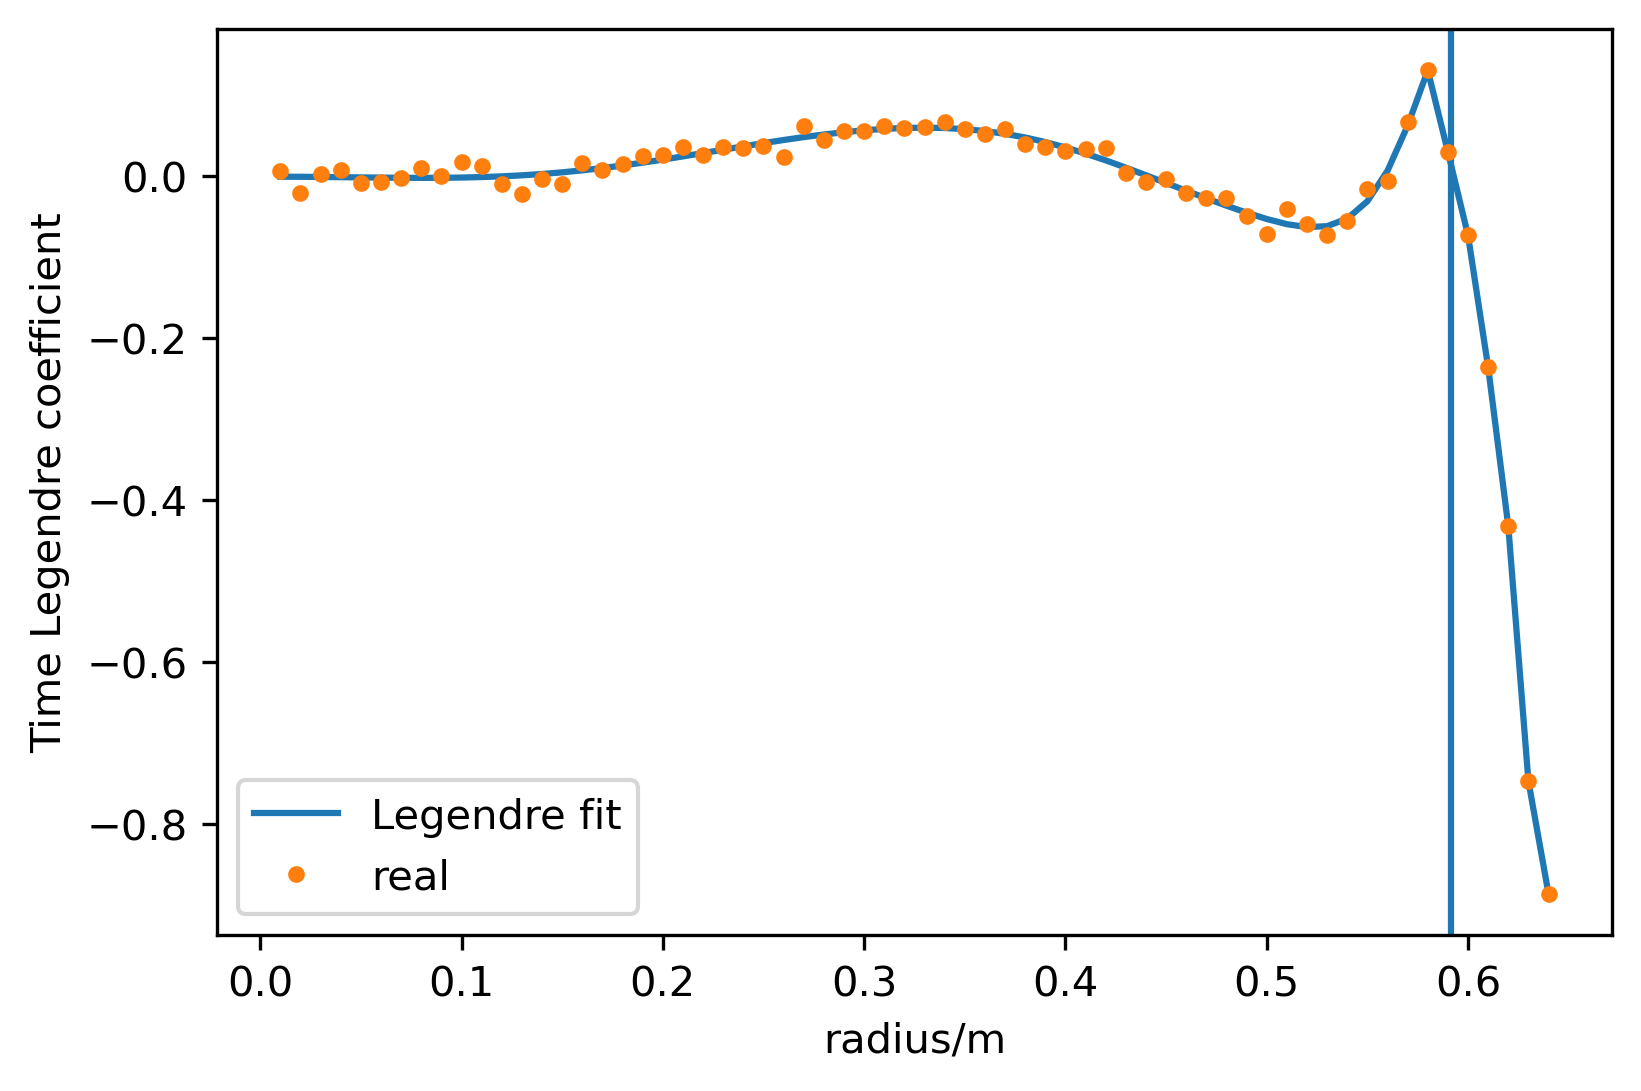

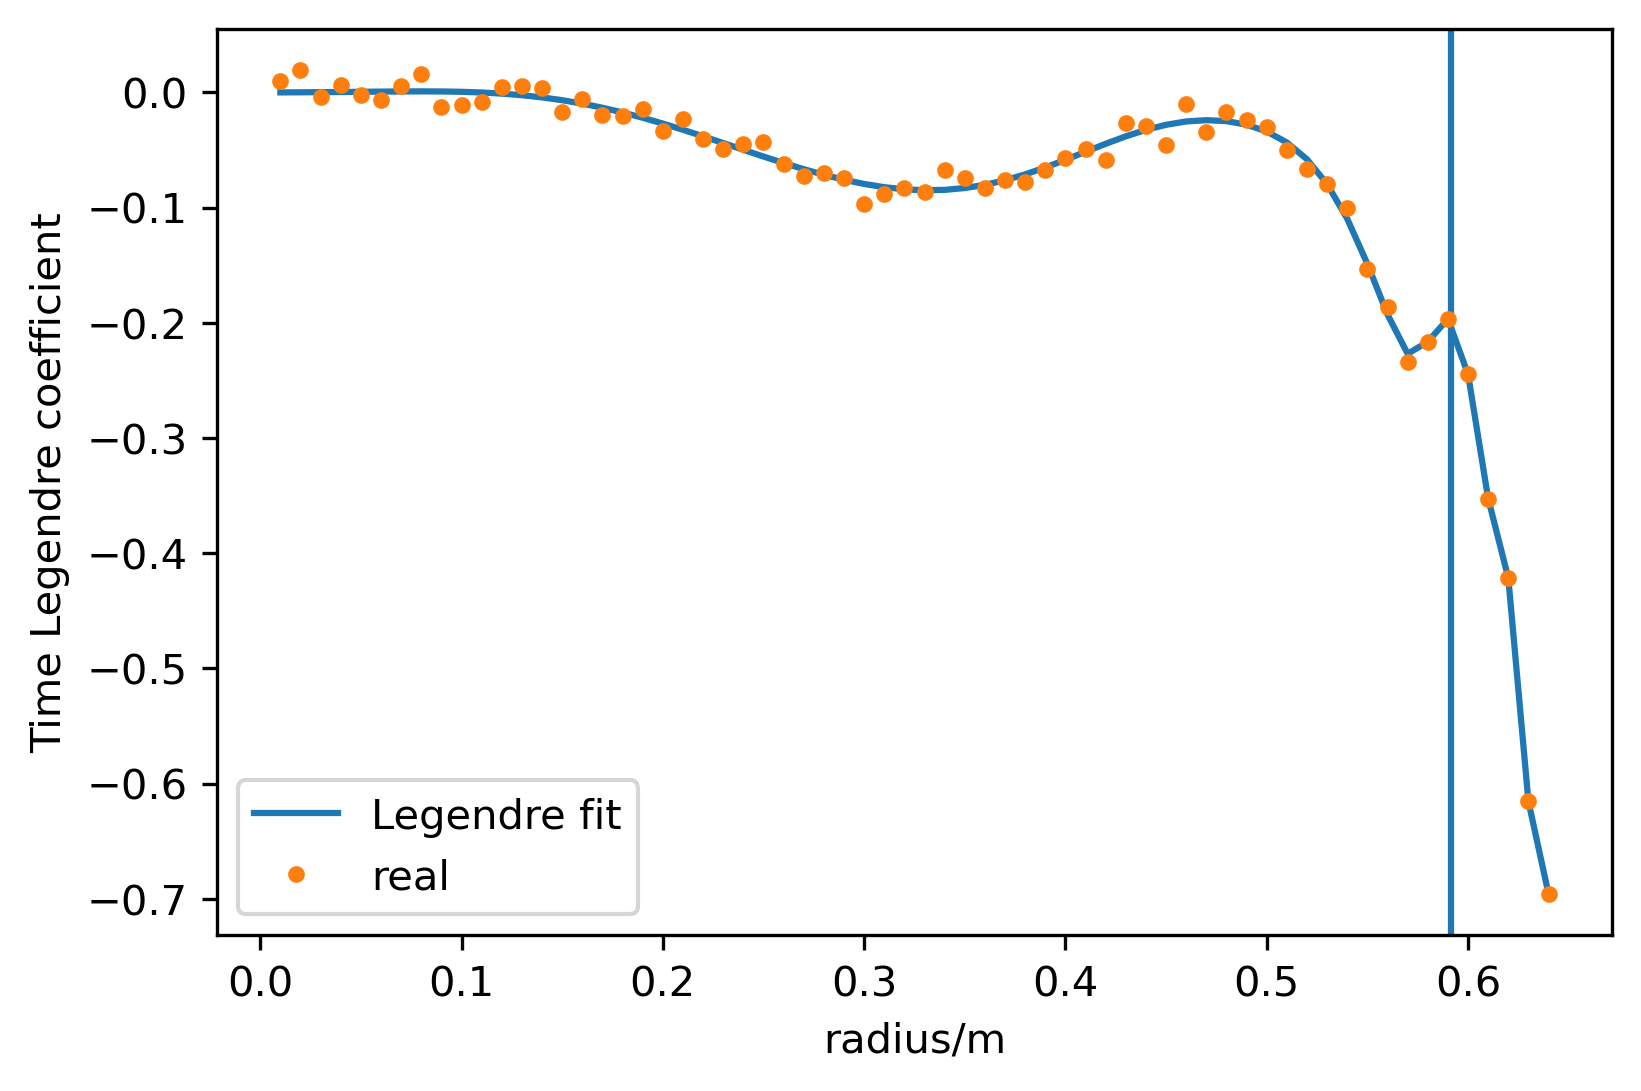

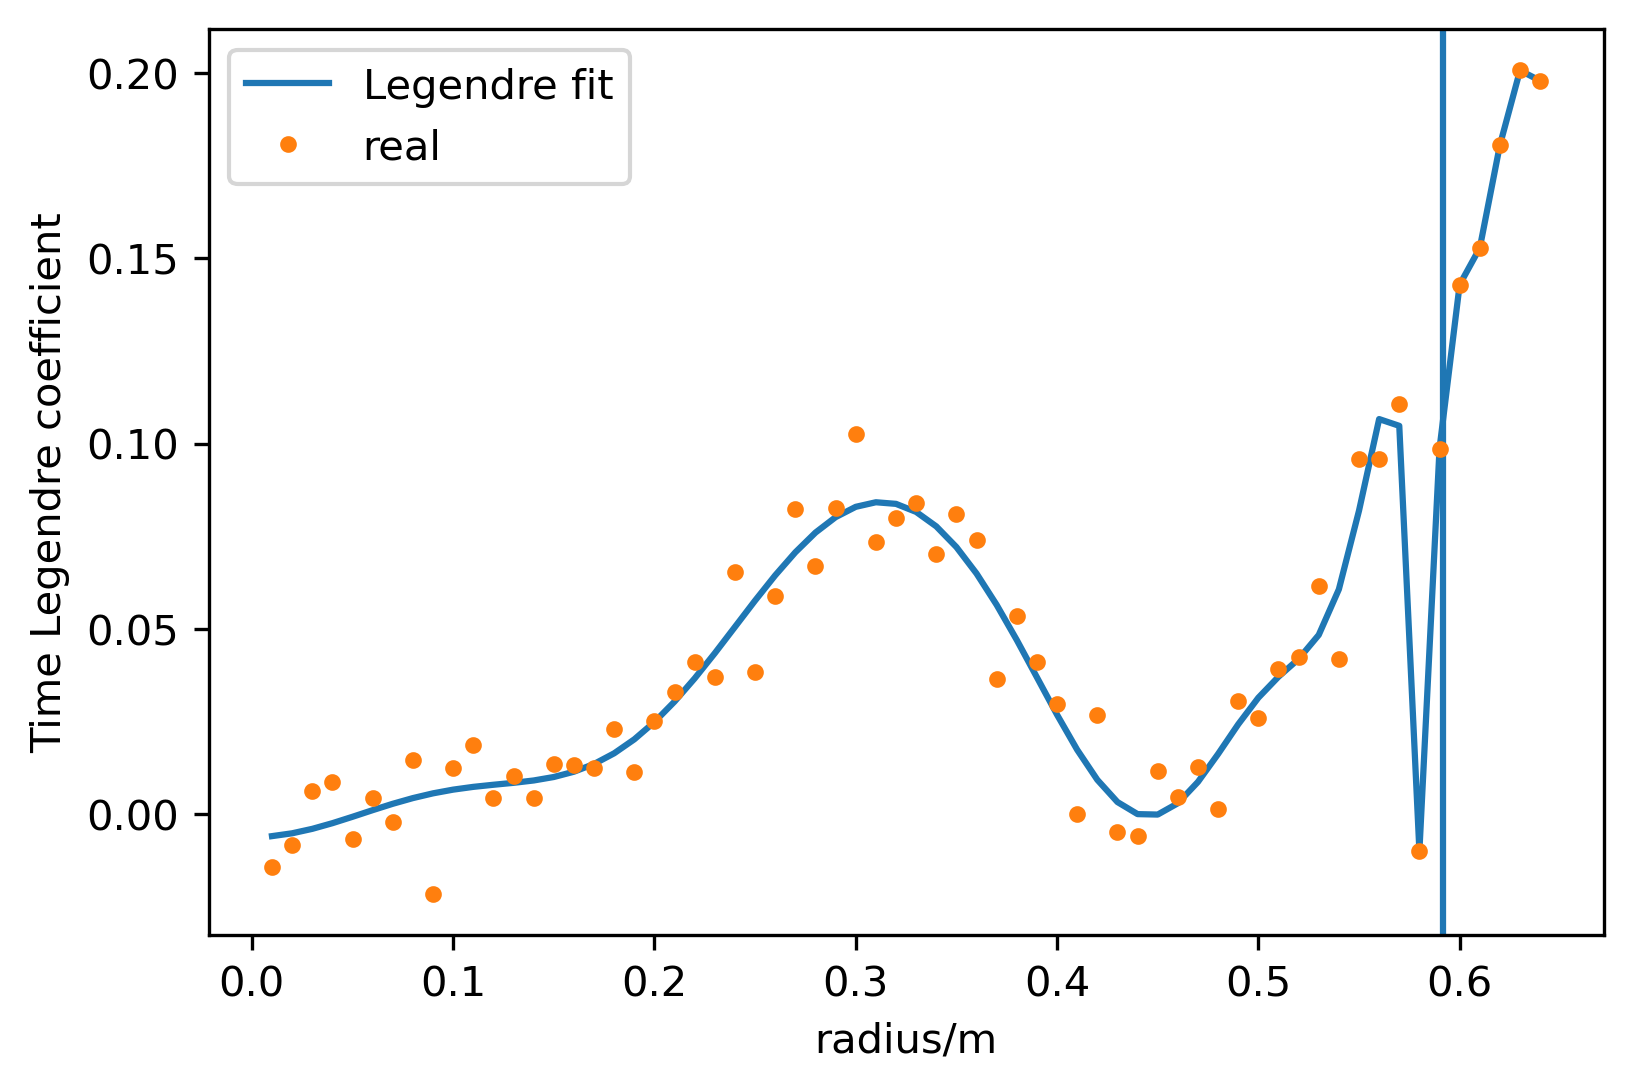

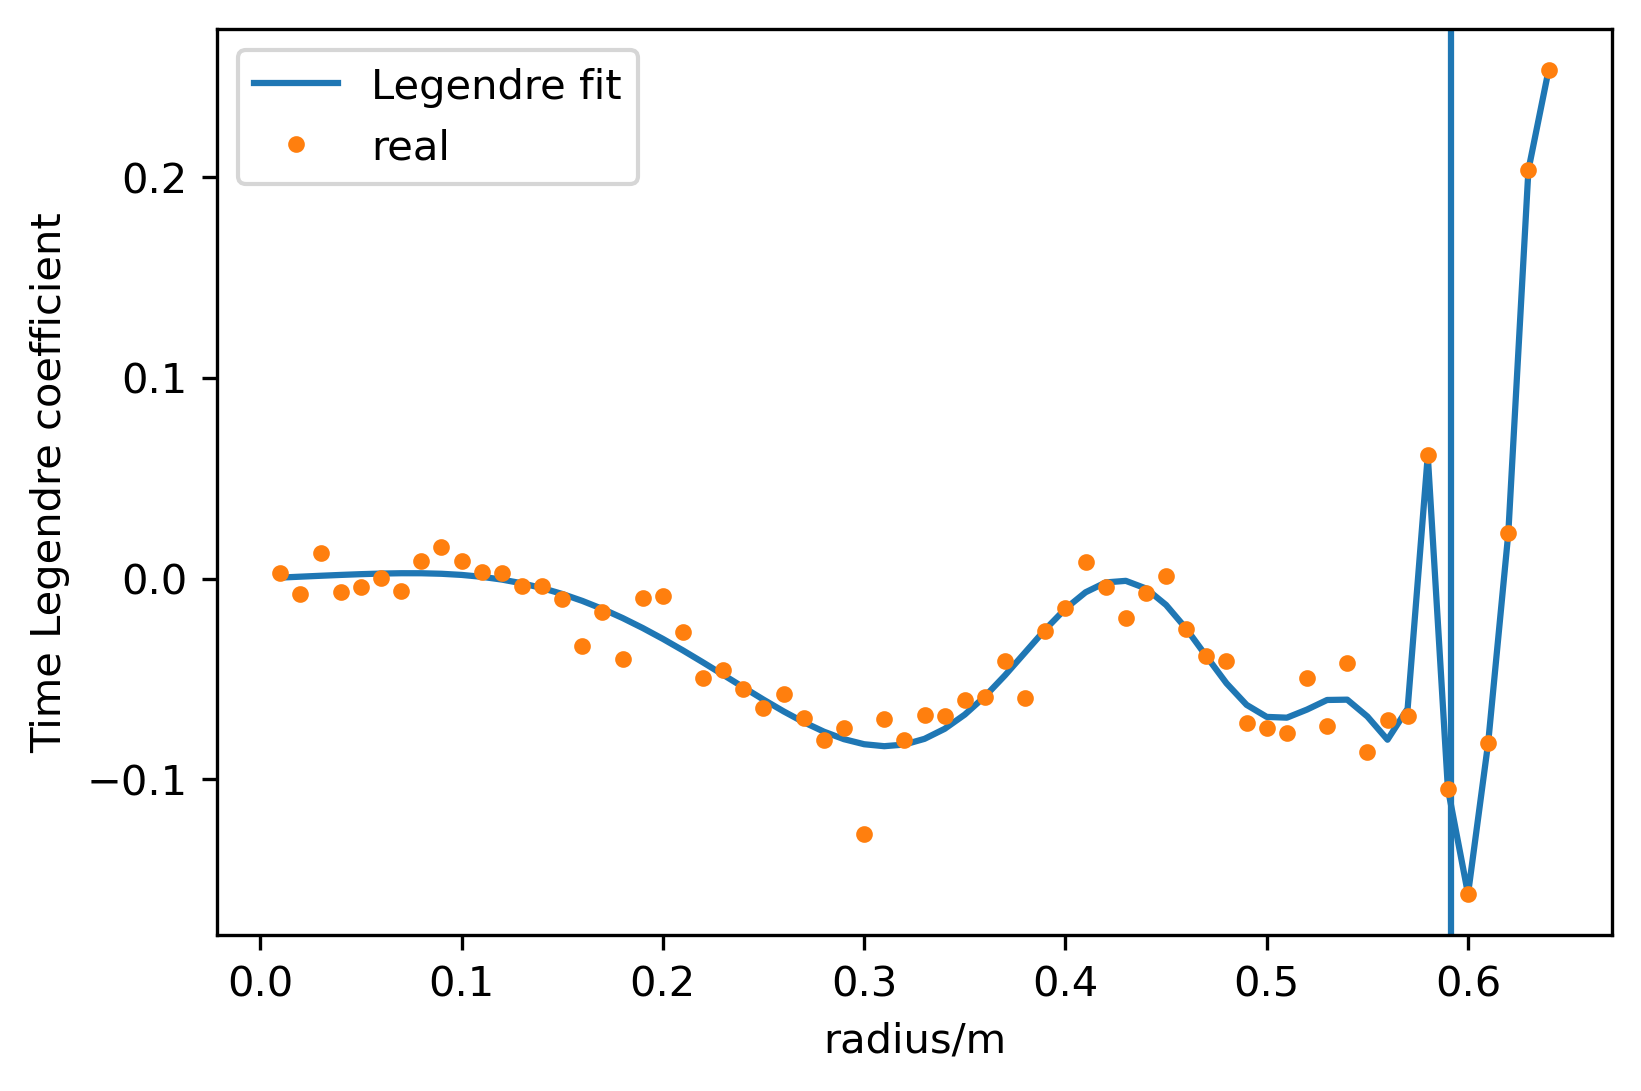

In [4]:
order = 8
fit_order = 10
rd, coeff_pe = readtime('./coeff_time_1t_reflection0.05_2MeV_0.1_2/')
print(rd.shape, coeff_pe.shape)

bd = 0.91
deg = 20
d = np.where(np.abs(rd-np.max(rd)*bd) == np.min(np.abs(rd-np.max(rd)*bd)))

for i in np.arange(order):
    index_in = (rd<=rd[d[0][0]])
    index_out = (rd>=rd[d[0][0]])

    if not i % 2:
        w_in = np.ones_like(rd[index_in])
        w_out = np.ones_like(rd[index_out])
        w_in[-1] = 1000
        w_out[0] = 1000
        if(i==0):
                w_in[-1] = 1000
        # Legendre coeff

        B_in, tmp = np.polynomial.legendre.legfit(np.hstack((rd[index_in]/np.max(rd),-rd[index_in]/np.max(rd))), \
                                                  np.hstack((coeff_pe[i,index_in], coeff_pe[i,index_in])), \
                                                  deg = deg, w = np.hstack((w_in,w_in)), full = True)

        y1_in = np.polynomial.legendre.legval(rd[index_in]/np.max(rd), B_in)
        
        B_out, tmp = np.polynomial.legendre.legfit(np.hstack((rd[index_out]/np.max(rd),-rd[index_out]/np.max(rd))), \
                                                  np.hstack((coeff_pe[i,index_out], coeff_pe[i,index_out])), \
                                                  deg = deg, w = np.hstack((w_out,w_out)), full = True)
        y1_out = np.polynomial.legendre.legval(rd[index_out]/np.max(rd), B_out)
        # polynormial coeff
        C_in = np.polyfit(np.hstack((rd[index_in]/np.max(rd),-rd[index_in]/np.max(rd))), \
                          np.hstack((coeff_pe[i,index_in], coeff_pe[i,index_in])), \
                          deg=deg)
        y2_in = np.polyval(C_in, rd[index_in]/np.max(rd))

        C_out = np.polyfit(np.hstack((rd[index_out]/np.max(rd),-rd[index_out]/np.max(rd))), \
                  np.hstack((coeff_pe[i,index_out], coeff_pe[i,index_out])), \
                  deg=deg)
        y2_out = np.polyval(C_out, rd[index_out]/np.max(rd))

    else:
        B_in, tmp = np.polynomial.legendre.legfit(np.hstack((rd[index_in]/np.max(rd),-rd[index_in]/np.max(rd))), \
                                                  np.hstack((coeff_pe[i,index_in], -coeff_pe[i,index_in])), \
                                                  deg=deg, w = np.hstack((w_in,w_in)), full=True)
        y1_in = np.polynomial.legendre.legval(rd[index_in]/np.max(rd), B_in)
        
        B_out, tmp = np.polynomial.legendre.legfit(np.hstack((rd[index_out]/np.max(rd),-rd[index_out]/np.max(rd))), \
                                                  np.hstack((coeff_pe[i,index_out], -coeff_pe[i,index_out])), \
                                                  deg=deg, w = np.hstack((w_out,w_out)), full=True)
        y1_out = np.polynomial.legendre.legval(rd[index_out]/np.max(rd), B_out)
        C_in = np.polyfit(np.hstack((rd[index_in]/np.max(rd),-rd[index_in]/np.max(rd))), \
                  np.hstack((coeff_pe[i,index_in], coeff_pe[i,index_in])), \
                  deg=deg)
        y2_in = np.polyval(C_in, rd[index_in]/np.max(rd))
        
        C_out = np.polyfit(np.hstack((rd[index_out]/np.max(rd),-rd[index_out]/np.max(rd))), \
                  np.hstack((coeff_pe[i,index_out], coeff_pe[i,index_out])), \
                  deg=deg)
        y2_out = np.polyval(C_out, rd[index_out]/np.max(rd))
 
    plt.figure(num = i+1, dpi = 300)
    plt.plot(rd, np.hstack((y1_in, y1_out[1:])),label = 'Legendre fit')
    plt.axvline(0.65*bd)
    #plt.plot(rd, np.hstack((y2_in, y2_out[1:])), label='poly')
    plt.plot(rd, coeff_pe[i],'.', label='real')
    plt.xlabel('radius/m')
    plt.ylabel('Time Legendre coefficient')
    plt.legend()
    plt.savefig('Time')
#A = np.polynomial.legendre.Legendre.fit(np.array((-0.5,0.4)), np.array((0.5,0.6)),deg=5)

(1012387, 3) (1012387, 6) (1012387,)


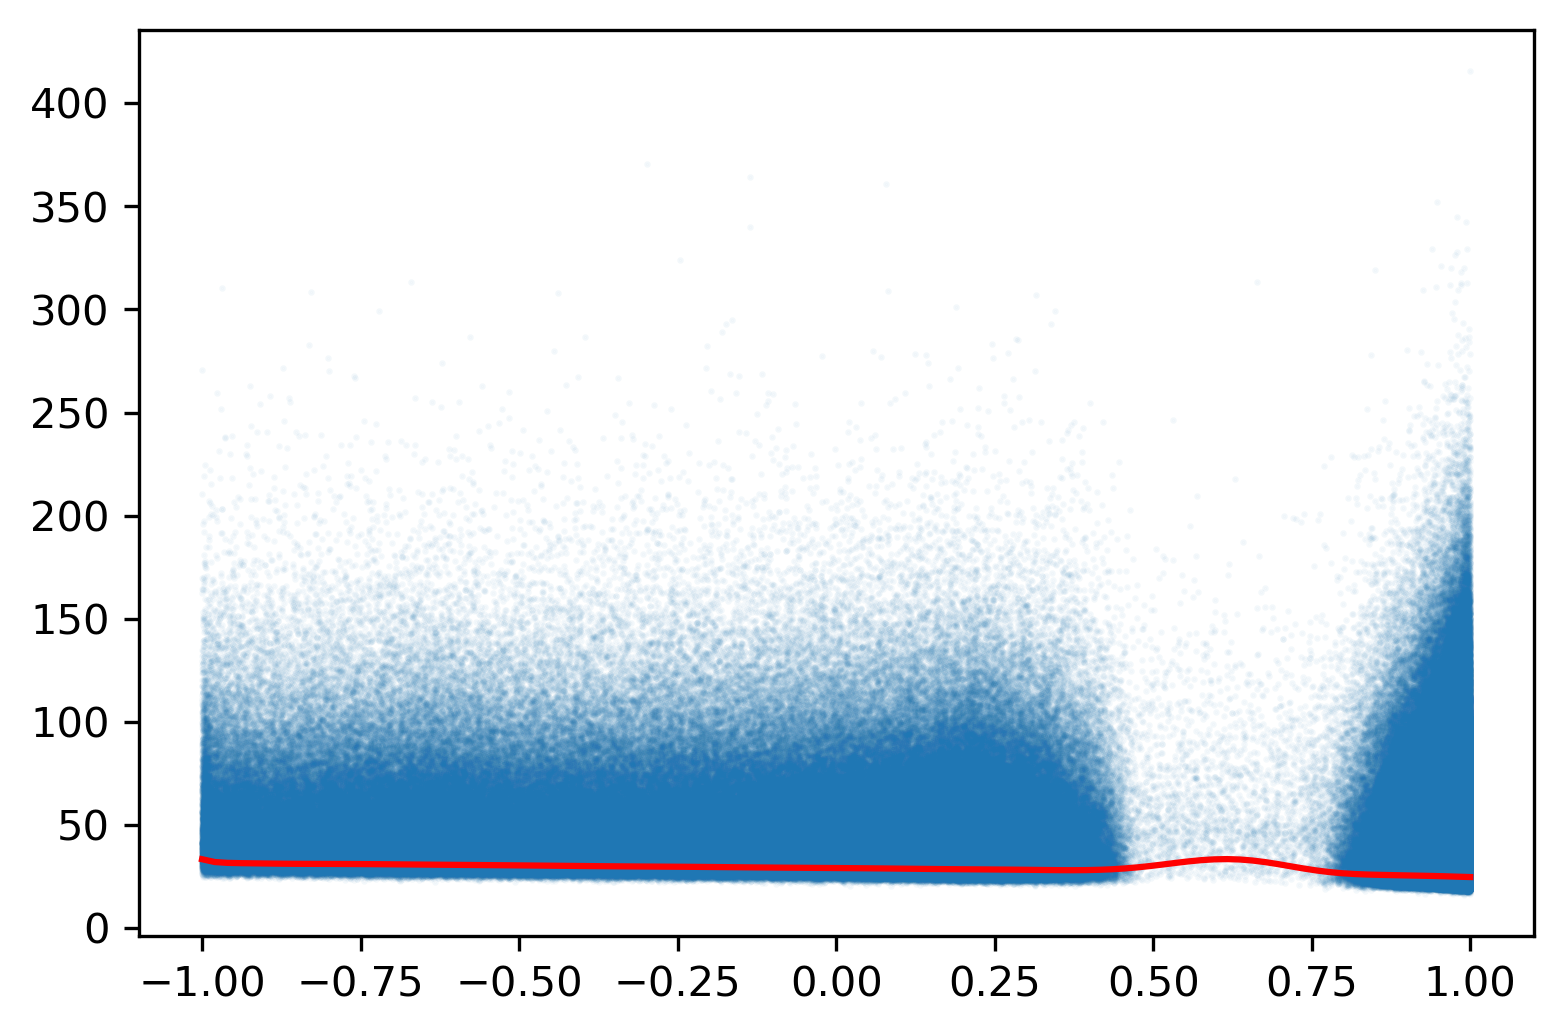

In [6]:
from numpy.polynomial import legendre as LG
def ReadPMT():
    '''
    # Read PMT position
    # output: 2d PMT position 30*3 (x, y, z)
    '''
    f = open(r"./PMT_1t.txt")
    line = f.readline()
    data_list = [] 
    while line:
        num = list(map(float,line.split()))
        data_list.append(num)
        line = f.readline()
    f.close()
    PMT_pos = np.array(data_list)
    return PMT_pos
def Legendre_coeff(PMT_pos_rep, vertex, cut):
    '''
    # calulate the Legendre value of transformed X
    # input: PMT_pos: PMT No * 3
          vertex: 'v' 
          cut: cut off of Legendre polynomial
    # output: x: as 'X' at the beginnig    
    
    '''
    size = np.size(PMT_pos_rep[:,0])
    # oh, it will use norm in future version
    
    if(np.sum(vertex**2) > 1e-6):
        cos_theta = np.sum(vertex*PMT_pos_rep,axis=1)\
            /np.sqrt(np.sum(vertex**2, axis=1)*np.sum(PMT_pos_rep**2,axis=1))
    else:
        # make r=0 as a boundry, it should be improved
        cos_theta = np.ones(size)

    x = np.zeros((size, cut))
    # legendre coeff
    for i in np.arange(0,cut):
        c = np.zeros(cut)
        c[i] = 1
        x[:,i] = LG.legval(cos_theta,c)

    print(PMT_pos_rep.shape, x.shape, cos_theta.shape)
    return x, cos_theta

plt.figure(dpi=300)
h = tables.open_file('coeff_time_1t_reflection0.05_2MeV_0.1_1/file_+0.620.h5')
z = np.linspace(-1,1,100)
k = LG.legval(z, h.root.coeff25[:])
h.close()
plt.plot(z, k, 'r-')

h1 = tables.open_file('/mnt/stage/douwei/Simulation/1t_root/reflection0.05/1t_+0.620Q.h5')
a1 = h1.root.GroundTruth[:]['PulseTime']
a2 = h1.root.GroundTruth[:]['ChannelID']
a3 = h1.root.GroundTruth[:]['EventID']
x = h1.root.TruthData[:]['x']
y = h1.root.TruthData[:]['y']
z = h1.root.TruthData[:]['z']
x1 = np.vstack((x, y, z)).T
counts = np.bincount(a3)
counts = counts[counts!=0]
PMT_pos = ReadPMT()
vertex = np.repeat(x1, counts, axis=0)
PMT_pos_rep = PMT_pos[a2]
tmp_x_p, cos_theta = Legendre_coeff(PMT_pos_rep, vertex, 6)
plt.scatter(cos_theta, a1, s=0.3,alpha=0.05)
plt.show()

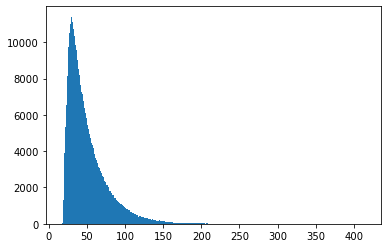

In [7]:
plt.hist(a1, bins=1000)
plt.show()

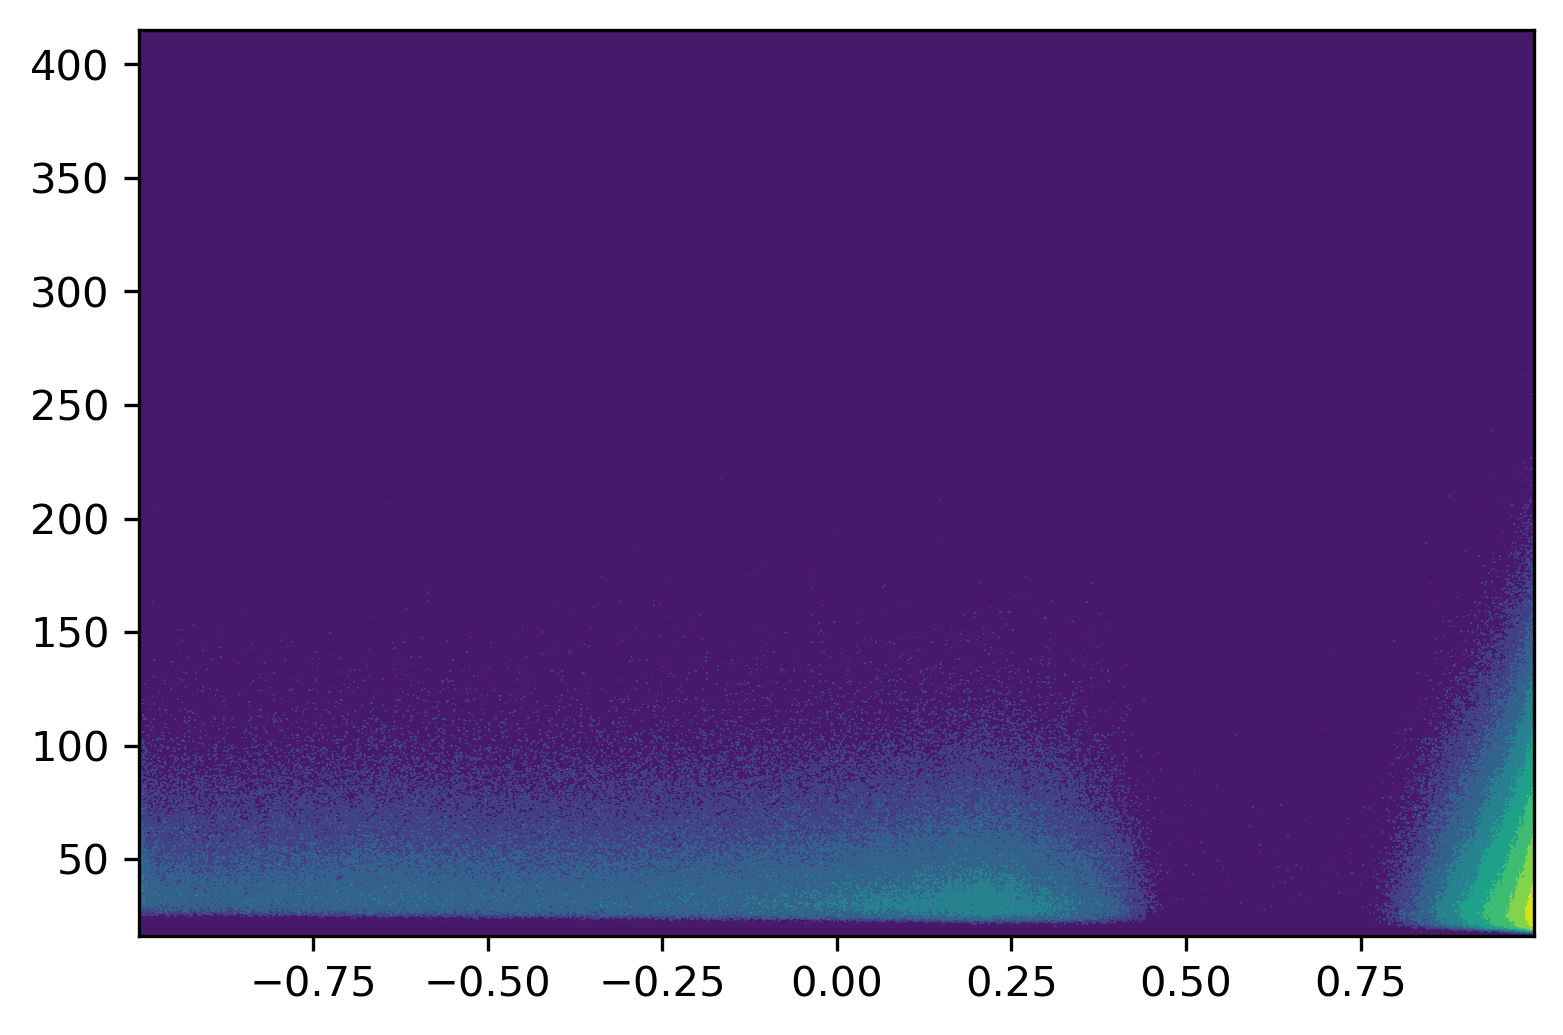

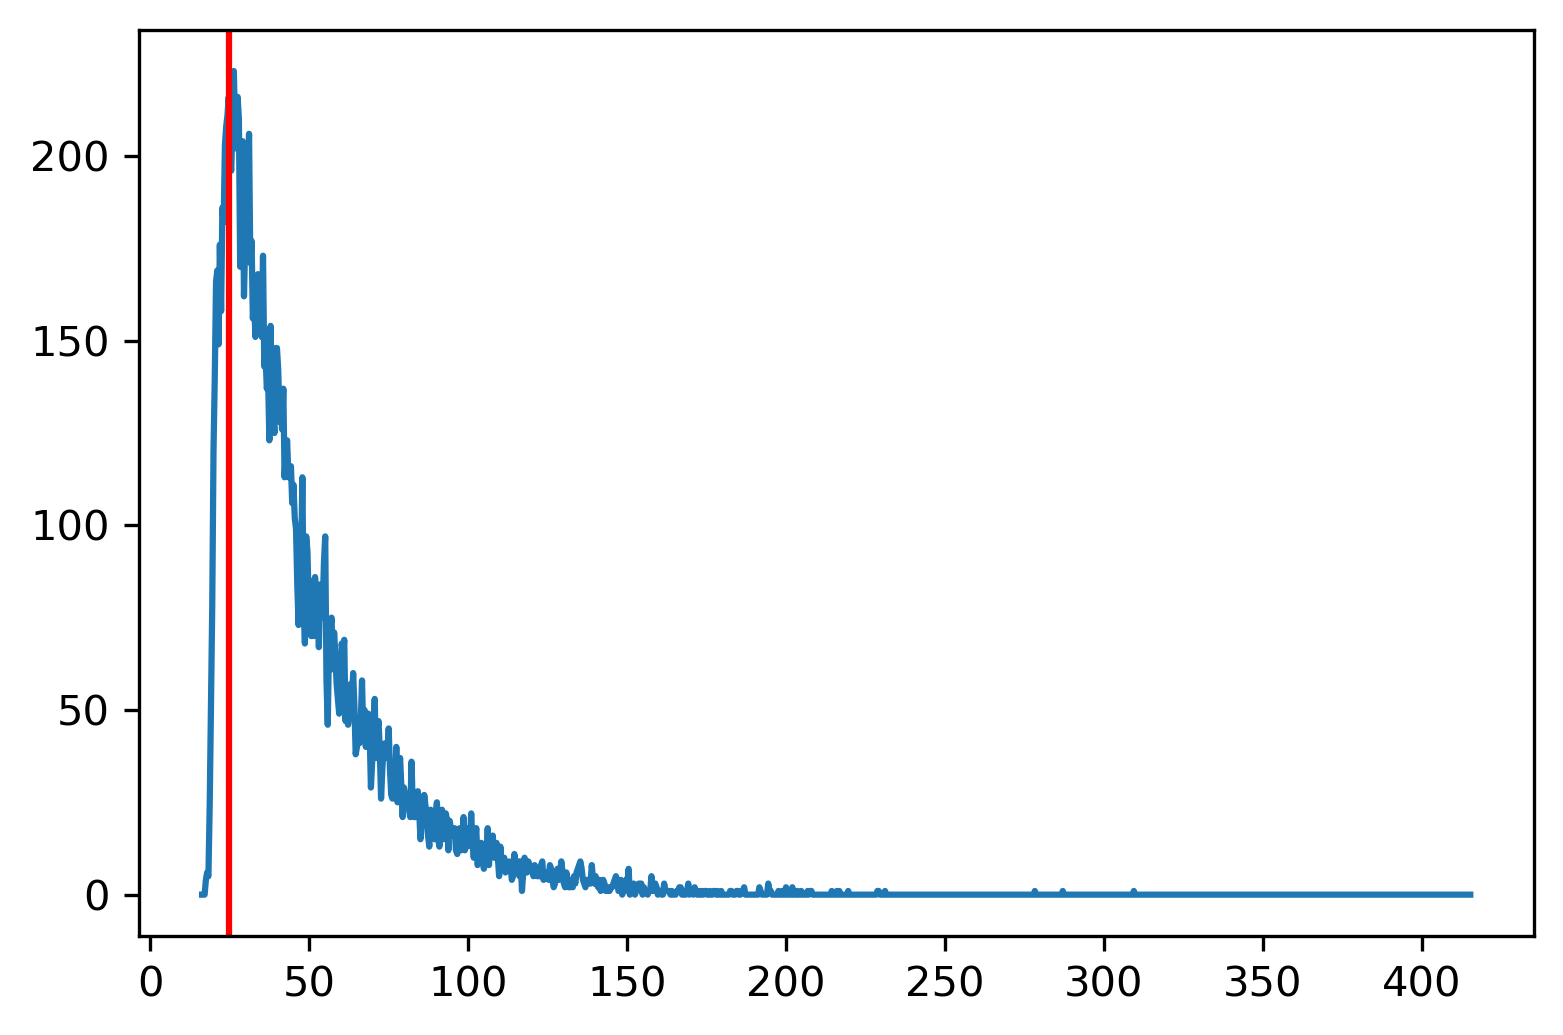

In [8]:
plt.figure(dpi=300)
H, xe, ye = np.histogram2d(cos_theta, a1, bins=1000)
plt.contourf(xe[:-1], ye[:-1], np.log(H.T+1))
#plt.contourf(xe[:-1], ye[:-1], H.T)
plt.figure(dpi=300)
index = 990
plt.plot(ye[:-1], H[index][:])
h = tables.open_file('coeff_time_1t_reflection0.05_2MeV_0.1_1/file_%+.2f0.h5' % (0.65*xe[index]))
z = np.linspace(-1,1,100)
k = LG.legval(xe[index], h.root.coeff25[:])
plt.axvline(k, color='red')
h.close()
plt.show()

In [9]:
print(coeff_pe[1][51],coeff_pe[1][57])
np.interp(rd[51:58],np.array((rd[51], rd[57])), np.array((coeff_pe[1][51],coeff_pe[1][57])))

-2.6026283853252146 -3.114888039176568


array([-2.60262839, -2.68800499, -2.7733816 , -2.85875821, -2.94413482,
       -3.02951143, -3.11488804])

In [12]:
qts = np.array((0.01,0.02,0.05,0.1,0.2,0.5))
order = 5
fit_order = 10
for qt in qts:
    rd, coeff_pe = readtime('./coeff_time_1t_shell_200000_%.2f/' % qt)

    bd = 0.88
    deg = 10
    d = np.where(np.abs(rd-np.max(rd)*bd) == np.min(np.abs(rd-np.max(rd)*bd)))

    for i in np.arange(order):
        plt.figure(num=i+1,dpi=300)
        plt.plot(rd, coeff_pe[i], label=f'qt = {qt}', linestyle='dotted')
        plt.xlabel('Radius/m')
        plt.ylabel('Time Legendre coefficient')
        plt.legend()
        plt.title('Time Legendre coefficients %d-th' % i)
        plt.savefig('coeff_Time_%d.png' % i)
#A = np.polynomial.legendre.Legendre.fit(np.array((-0.5,0.4)), np.array((0.5,0.6)),deg=5)

ValueError: zero-size array to reduction operation maximum which has no identity

(2803760, 3) (2803760, 6) (2803760,)


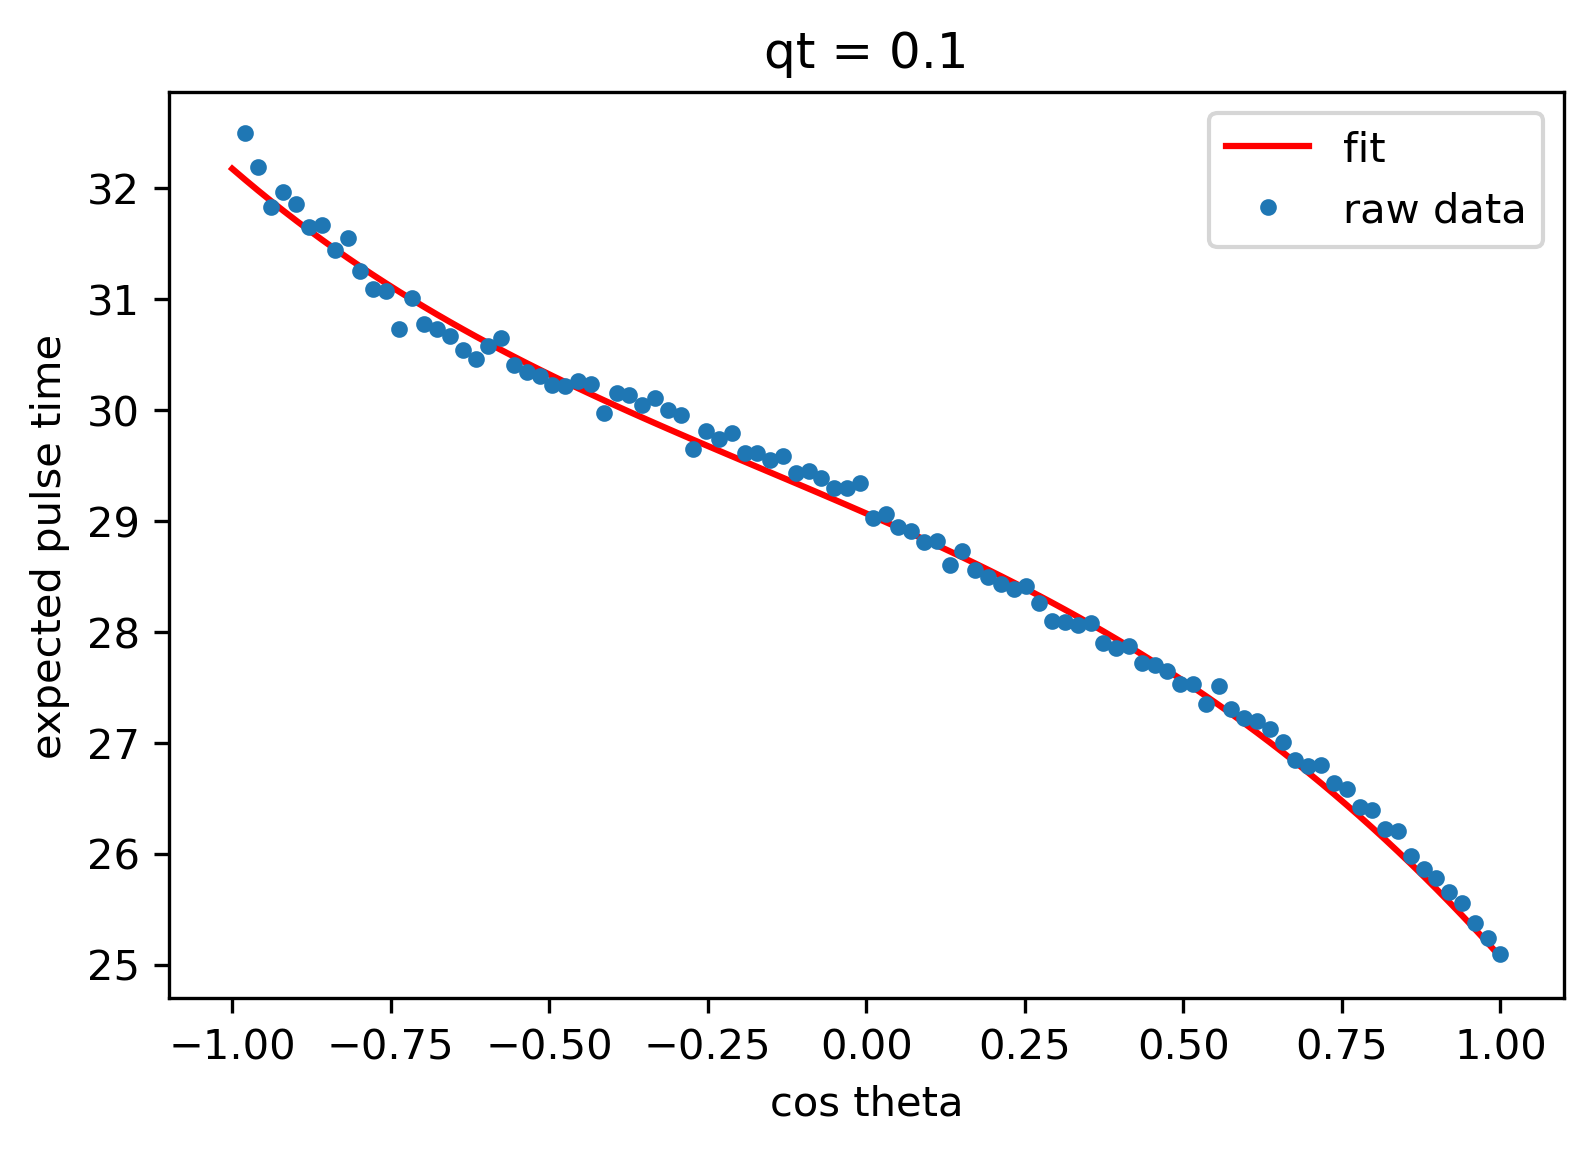

In [153]:
from numpy.polynomial import legendre as LG
def ReadPMT():
    '''
    # Read PMT position
    # output: 2d PMT position 30*3 (x, y, z)
    '''
    f = open(r"./PMT_1t.txt")
    line = f.readline()
    data_list = [] 
    while line:
        num = list(map(float,line.split()))
        data_list.append(num)
        line = f.readline()
    f.close()
    PMT_pos = np.array(data_list)
    return PMT_pos
def Legendre_coeff(PMT_pos_rep, vertex, cut):
    '''
    # calulate the Legendre value of transformed X
    # input: PMT_pos: PMT No * 3
          vertex: 'v' 
          cut: cut off of Legendre polynomial
    # output: x: as 'X' at the beginnig    
    
    '''
    size = np.size(PMT_pos_rep[:,0])
    # oh, it will use norm in future version
    
    if(np.sum(vertex**2) > 1e-6):
        cos_theta = np.sum(vertex*PMT_pos_rep,axis=1)\
            /np.sqrt(np.sum(vertex**2, axis=1)*np.sum(PMT_pos_rep**2,axis=1))
    else:
        # make r=0 as a boundry, it should be improved
        cos_theta = np.ones(size)

    x = np.zeros((size, cut))
    # legendre coeff
    for i in np.arange(0,cut):
        c = np.zeros(cut)
        c[i] = 1
        x[:,i] = LG.legval(cos_theta,c)

    print(PMT_pos_rep.shape, x.shape, cos_theta.shape)
    return x, cos_theta

plt.figure(dpi=300)
h = tables.open_file('coeff_time_1t_reflection0.05_2MeV_0.1_2/file_+0.580.h5')
z = np.linspace(-1,1,100)
k = LG.legval(z, h.root.coeff5[:])
h.close()
plt.plot(z, k, 'r-', label='fit')

h1 = tables.open_file('/mnt/stage/douwei/Simulation/1t_root/reflection0.05_2MeV/1t_+0.580Q.h5')
a1 = h1.root.GroundTruth[:]['PulseTime']
a2 = h1.root.GroundTruth[:]['ChannelID']
a3 = h1.root.GroundTruth[:]['EventID']
x = h1.root.TruthData[:]['x']
y = h1.root.TruthData[:]['y']
z = h1.root.TruthData[:]['z']
x1 = np.vstack((x, y, z)).T
counts = np.bincount(a3)
counts = counts[counts!=0]
PMT_pos = ReadPMT()
vertex = np.repeat(x1, counts, axis=0)
PMT_pos_rep = PMT_pos[a2]
tmp_x_p, cos_theta = Legendre_coeff(PMT_pos_rep, vertex, 6)
#plt.scatter(cos_theta, a1, s=0.3,alpha=0.05)
bins = np.linspace(-1,1,100)
index = np.digitize(cos_theta, bins)
tmp = []
for ii, i in enumerate(np.unique(index)):
    tmp.append(np.quantile(a1[index==i],0.1))
plt.plot(bins[1:], np.array(tmp),'.',label='raw data')
plt.xlabel('cos theta')
plt.ylabel('expected pulse time')
plt.title('qt = 0.1')
plt.legend()
plt.show()

In [119]:
cos_theta[index==1]

array([-0.99091442, -0.99091442, -0.99091442, ..., -0.98599839,
       -0.98599839, -0.98599839])

(2648293, 3) (2648293, 6) (2648293,)


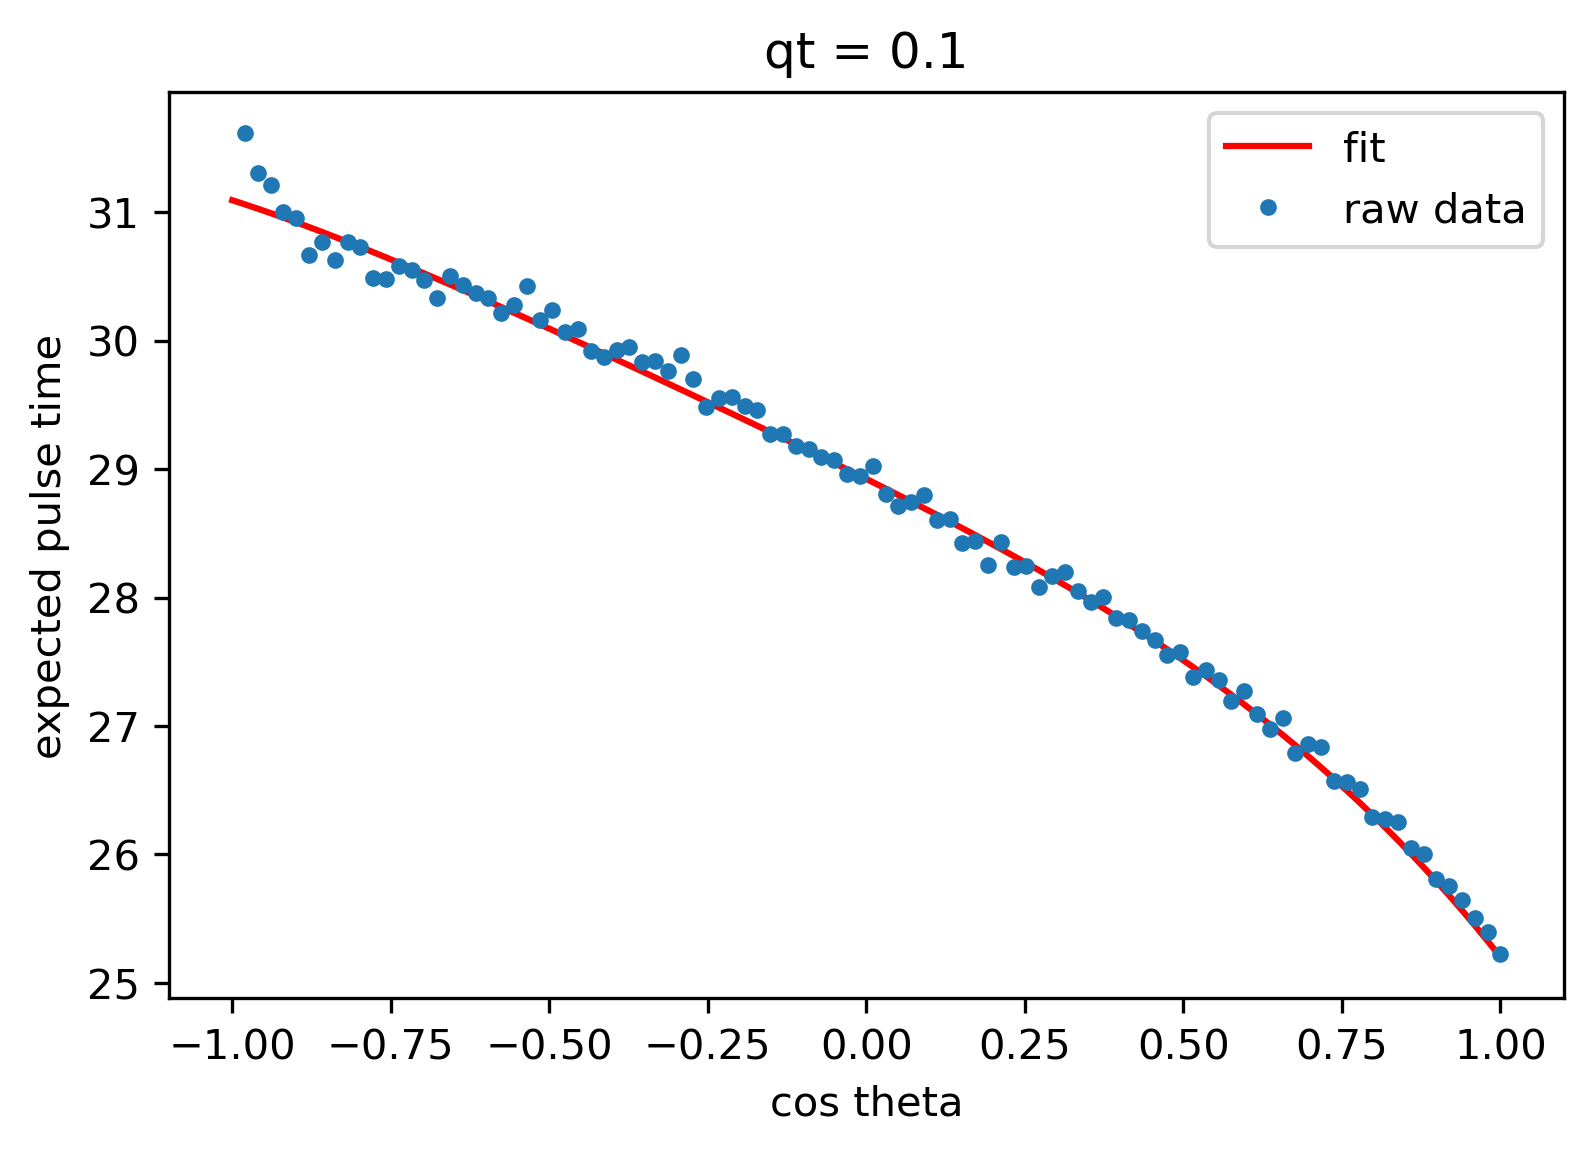

In [187]:
from numpy.polynomial import legendre as LG
def ReadPMT():
    '''
    # Read PMT position
    # output: 2d PMT position 30*3 (x, y, z)
    '''
    f = open(r"./PMT_1t.txt")
    line = f.readline()
    data_list = [] 
    while line:
        num = list(map(float,line.split()))
        data_list.append(num)
        line = f.readline()
    f.close()
    PMT_pos = np.array(data_list)
    return PMT_pos
def Legendre_coeff(PMT_pos_rep, vertex, cut):
    '''
    # calulate the Legendre value of transformed X
    # input: PMT_pos: PMT No * 3
          vertex: 'v' 
          cut: cut off of Legendre polynomial
    # output: x: as 'X' at the beginnig    
    
    '''
    size = np.size(PMT_pos_rep[:,0])
    # oh, it will use norm in future version
    
    if(np.sum(vertex**2) > 1e-6):
        cos_theta = np.sum(vertex*PMT_pos_rep,axis=1)\
            /np.sqrt(np.sum(vertex**2, axis=1)*np.sum(PMT_pos_rep**2,axis=1))
    else:
        # make r=0 as a boundry, it should be improved
        cos_theta = np.ones(size)

    x = np.zeros((size, cut))
    # legendre coeff
    for i in np.arange(0,cut):
        c = np.zeros(cut)
        c[i] = 1
        x[:,i] = LG.legval(cos_theta,c)

    print(PMT_pos_rep.shape, x.shape, cos_theta.shape)
    return x, cos_theta

plt.figure(dpi=300)
h = tables.open_file('coeff_time_1t_reflection0.05_2MeV_0.1_2/file_+0.550.h5')
z = np.linspace(-1,1,100)
k = LG.legval(z, h.root.coeff5[:])
h.close()
plt.plot(z, k, 'r-', label='fit')

h1 = tables.open_file('/mnt/stage/douwei/Simulation/1t_root/reflection0.05_2MeV/1t_+0.550Q.h5')
a1 = h1.root.GroundTruth[:]['PulseTime']
a2 = h1.root.GroundTruth[:]['ChannelID']
a3 = h1.root.GroundTruth[:]['EventID']
x = h1.root.TruthData[:]['x']
y = h1.root.TruthData[:]['y']
z = h1.root.TruthData[:]['z']
x1 = np.vstack((x, y, z)).T
counts = np.bincount(a3)
counts = counts[counts!=0]
PMT_pos = ReadPMT()
vertex = np.repeat(x1, counts, axis=0)
PMT_pos_rep = PMT_pos[a2]
tmp_x_p, cos_theta = Legendre_coeff(PMT_pos_rep, vertex, 6)
#plt.scatter(cos_theta, a1, s=0.3,alpha=0.05)
bins = np.linspace(-1,1,100)
index = np.digitize(cos_theta, bins)
tmp = []
for ii, i in enumerate(np.unique(index)):
    tmp.append(np.quantile(a1[index==i],0.1))
plt.plot(bins[1:], np.array(tmp),'.',label='raw data')
plt.xlabel('cos theta')
plt.ylabel('expected pulse time')
plt.title('qt = 0.1')
plt.legend()
plt.show()

(1012387, 3) (1012387, 6) (1012387,)


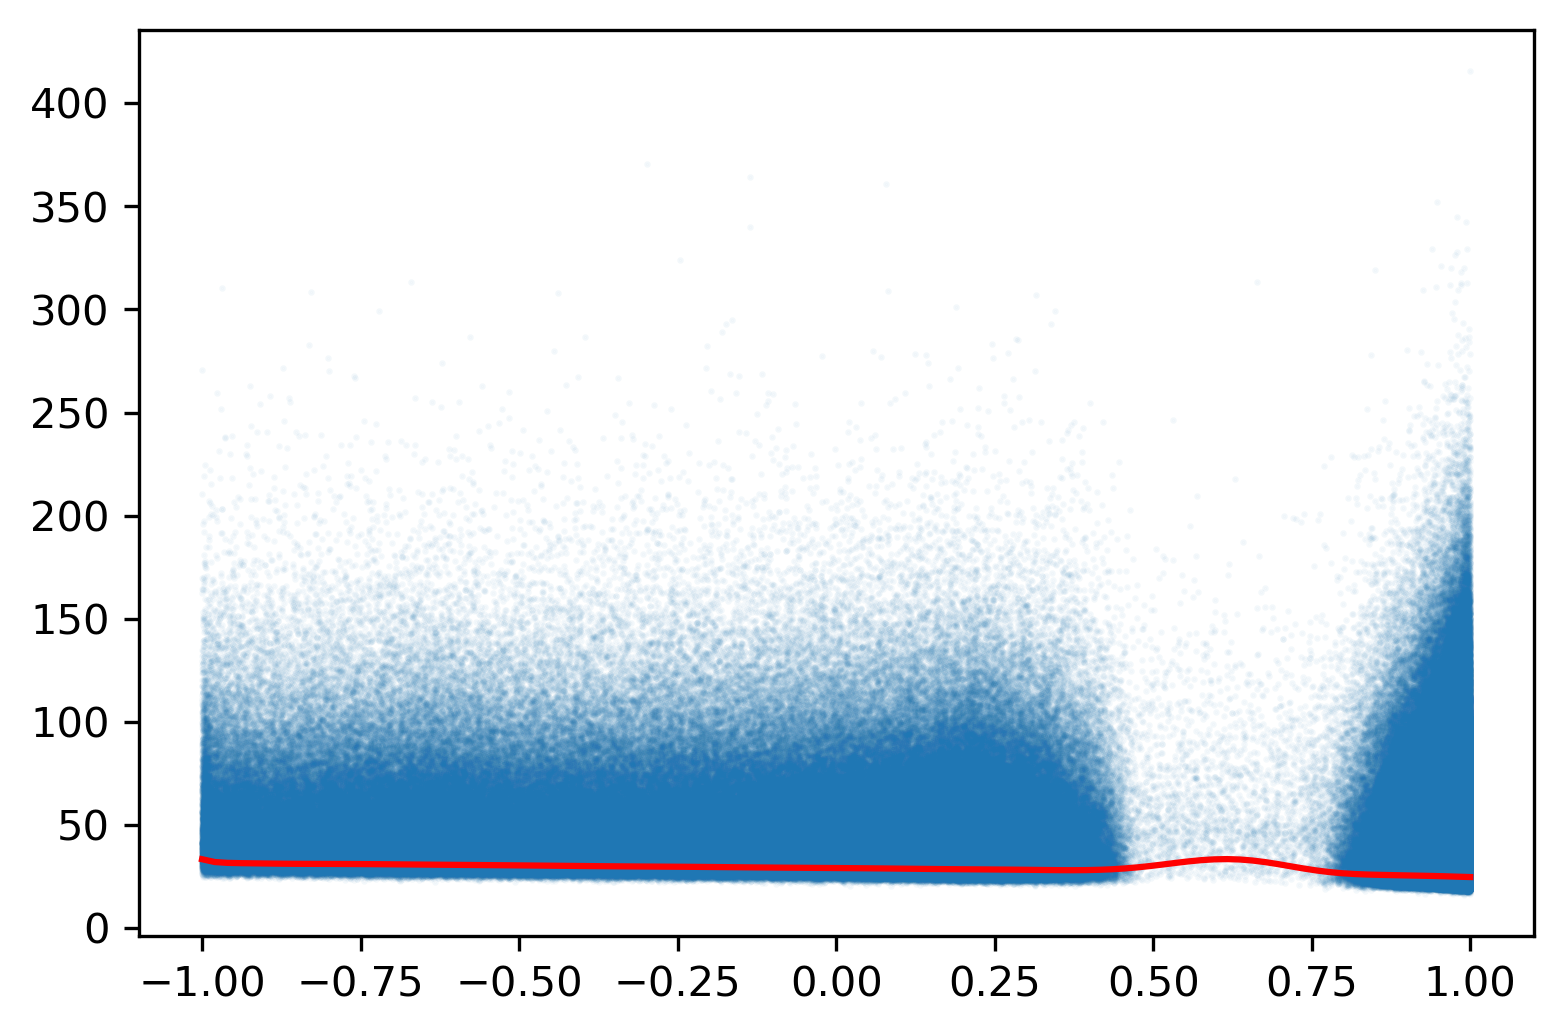

In [7]:
from numpy.polynomial import legendre as LG
def ReadPMT():
    '''
    # Read PMT position
    # output: 2d PMT position 30*3 (x, y, z)
    '''
    f = open(r"./PMT_1t.txt")
    line = f.readline()
    data_list = [] 
    while line:
        num = list(map(float,line.split()))
        data_list.append(num)
        line = f.readline()
    f.close()
    PMT_pos = np.array(data_list)
    return PMT_pos
def Legendre_coeff(PMT_pos_rep, vertex, cut):
    '''
    # calulate the Legendre value of transformed X
    # input: PMT_pos: PMT No * 3
          vertex: 'v' 
          cut: cut off of Legendre polynomial
    # output: x: as 'X' at the beginnig    
    
    '''
    size = np.size(PMT_pos_rep[:,0])
    # oh, it will use norm in future version
    
    if(np.sum(vertex**2) > 1e-6):
        cos_theta = np.sum(vertex*PMT_pos_rep,axis=1)\
            /np.sqrt(np.sum(vertex**2, axis=1)*np.sum(PMT_pos_rep**2,axis=1))
    else:
        # make r=0 as a boundry, it should be improved
        cos_theta = np.ones(size)

    x = np.zeros((size, cut))
    # legendre coeff
    for i in np.arange(0,cut):
        c = np.zeros(cut)
        c[i] = 1
        x[:,i] = LG.legval(cos_theta,c)

    print(PMT_pos_rep.shape, x.shape, cos_theta.shape)
    return x, cos_theta

plt.figure(dpi=300)
h = tables.open_file('coeff_time_1t_reflection0.05_2MeV_0.1_1/file_+0.620.h5')
z = np.linspace(-1,1,100)
k = LG.legval(z, h.root.coeff25[:])
h.close()
plt.plot(z, k, 'r-')

h1 = tables.open_file('/mnt/stage/douwei/Simulation/1t_root/reflection0.05/1t_+0.620Q.h5')
a1 = h1.root.GroundTruth[:]['PulseTime']
a2 = h1.root.GroundTruth[:]['ChannelID']
a3 = h1.root.GroundTruth[:]['EventID']
x = h1.root.TruthData[:]['x']
y = h1.root.TruthData[:]['y']
z = h1.root.TruthData[:]['z']
x1 = np.vstack((x, y, z)).T
counts = np.bincount(a3)
counts = counts[counts!=0]
PMT_pos = ReadPMT()
vertex = np.repeat(x1, counts, axis=0)
PMT_pos_rep = PMT_pos[a2]
tmp_x_p, cos_theta = Legendre_coeff(PMT_pos_rep, vertex, 6)
plt.scatter(cos_theta, a1, s=0.3,alpha=0.05)
plt.show()

<ipython-input-22-1b4050a0a5a4>:3: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(xe[:-1], ye[:-1], np.log(H.T+1), label='Data')


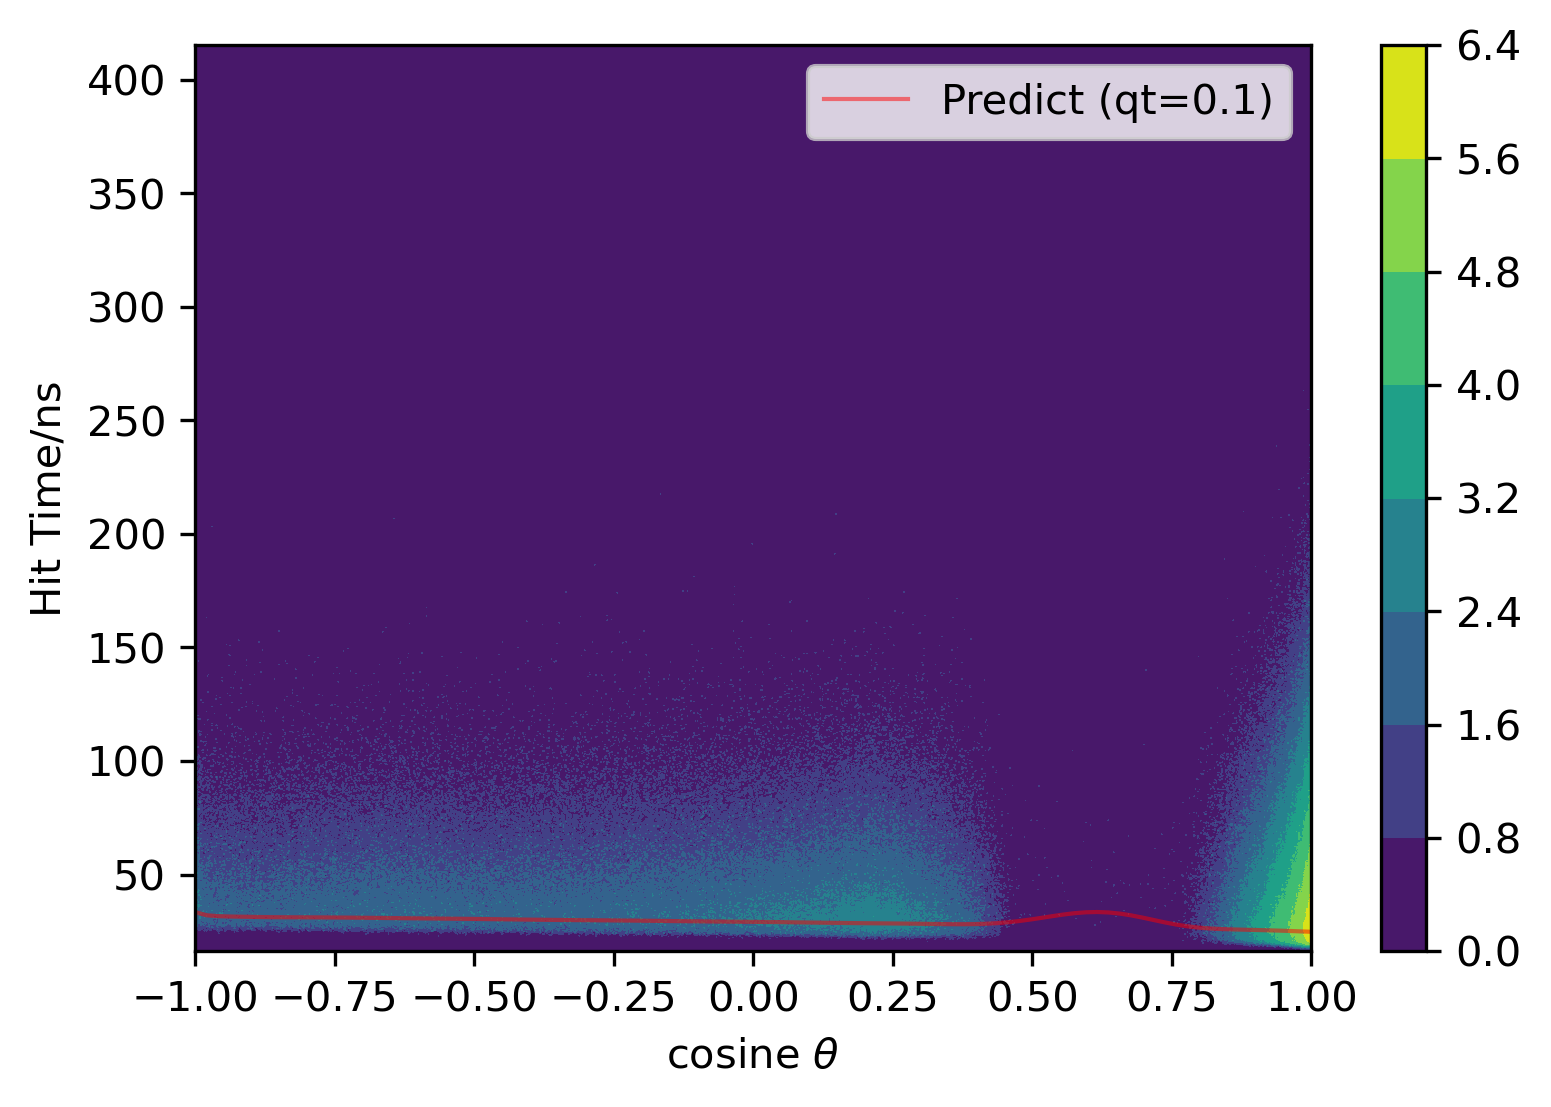

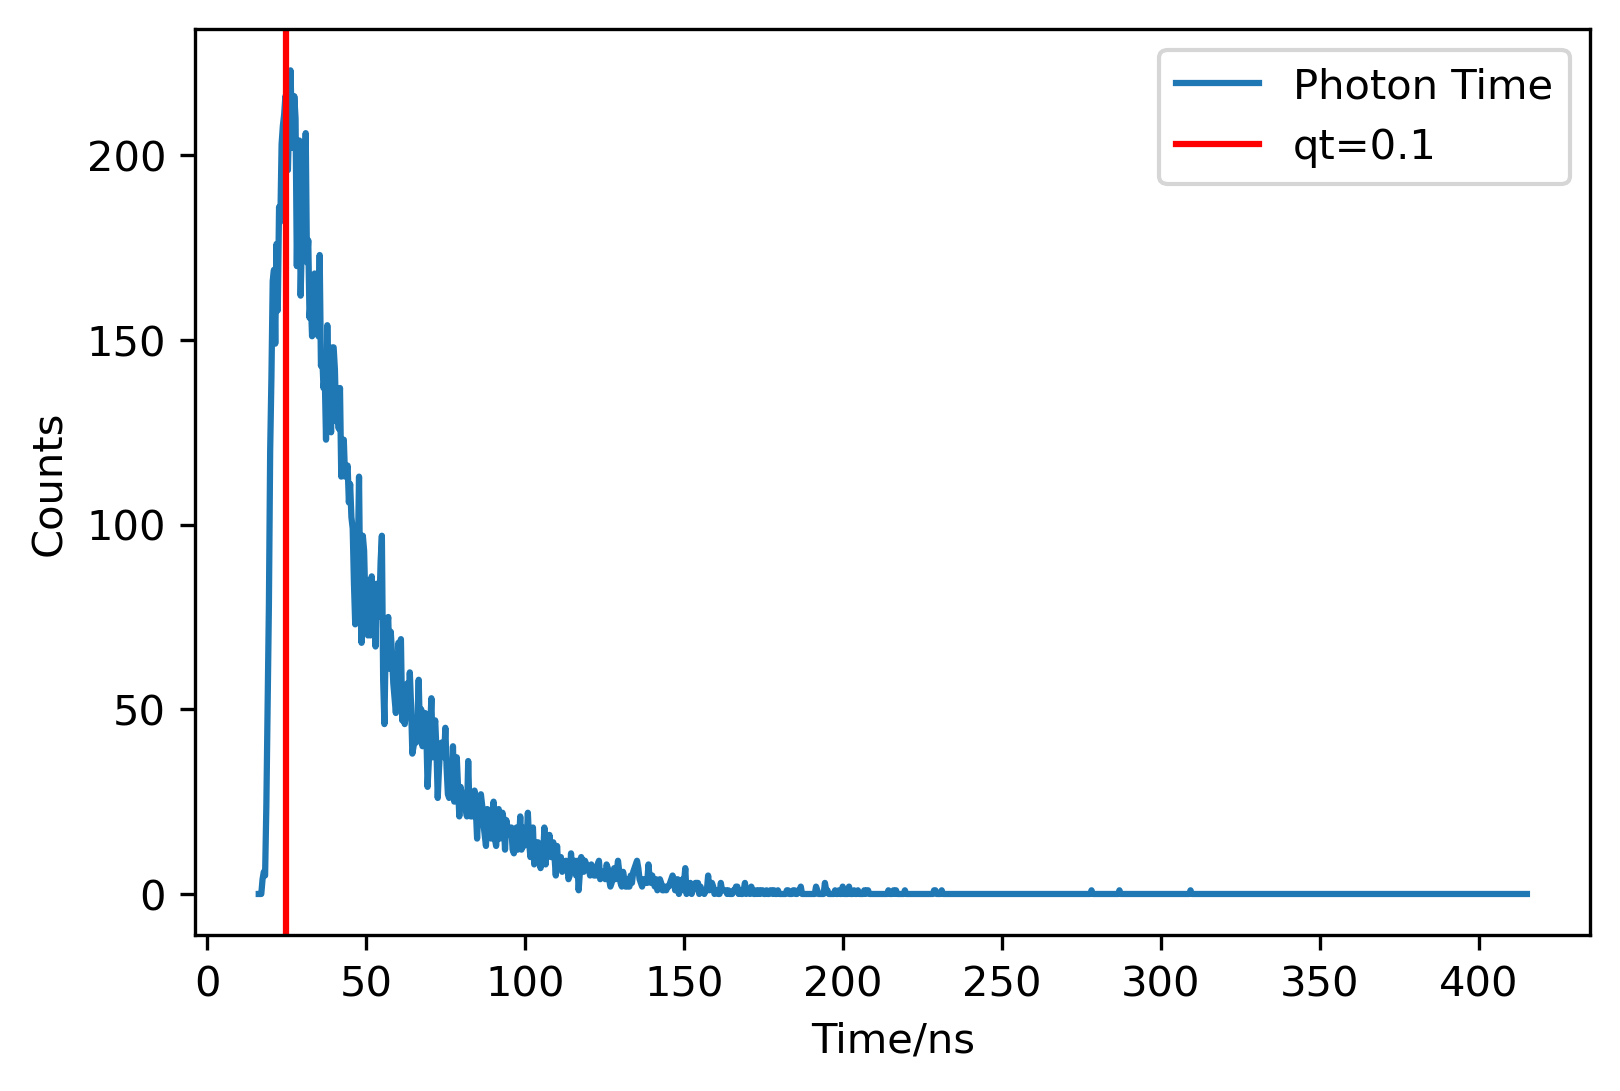

In [22]:
plt.figure(dpi=300)
H, xe, ye = np.histogram2d(cos_theta, a1, bins=1000)
plt.contourf(xe[:-1], ye[:-1], np.log(H.T+1), label='Data')


h = tables.open_file('coeff_time_1t_reflection0.05_2MeV_0.1_1/file_+0.620.h5')
z = np.linspace(-1,1,100)
k = LG.legval(z, h.root.coeff25[:])
h.close()
plt.plot(z, k, 'r-', alpha=0.5, linewidth=1, label='Predict (qt=0.1)')
plt.xlim([-1,1])
plt.xlabel(r'cosine $\theta$')
plt.ylabel('Hit Time/ns')
plt.colorbar()
plt.legend()
plt.show()
#plt.contourf(xe[:-1], ye[:-1], H.T)
plt.figure(dpi=300)
index = 990
plt.plot(ye[:-1], H[index][:], label='Photon Time')
h = tables.open_file('coeff_time_1t_reflection0.05_2MeV_0.1_1/file_%+.2f0.h5' % (0.65*xe[index]))
z = np.linspace(-1,1,100)
k = LG.legval(xe[index], h.root.coeff25[:])
plt.axvline(k, color='red',label = 'qt=0.1')
plt.xlabel('Time/ns')
plt.ylabel('Counts')
plt.legend()
h.close()
plt.show()